In [4]:
import numpy as np
import torch
from torch.utils.data import Dataset
import logging
import os
import scipy.ndimage as ndi
from skimage.exposure import equalize_adapthist
import tifffile as ti
import multiprocessing as mp
import pandas as pd
import cv2
import random
import time
import skimage.io as skio
import timeit
import torch 
import torchvision.transforms as T
import skimage
import matplotlib
import matplotlib.pyplot as plt
from pymoo.core.problem import ElementwiseProblem
from skimage.metrics import structural_similarity as ssim
import skimage.measure    
from itertools import repeat

npzfile = np.load("./optimization_result.npz")

X = npzfile['X']
F = npzfile['F']
n_evals = npzfile['n_evals']
opt = npzfile['opt']

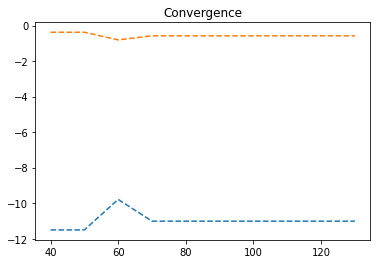

In [5]:
plt.title("Convergence")
plt.plot(n_evals, opt, "--")
# plt.yscale("log")
plt.show()

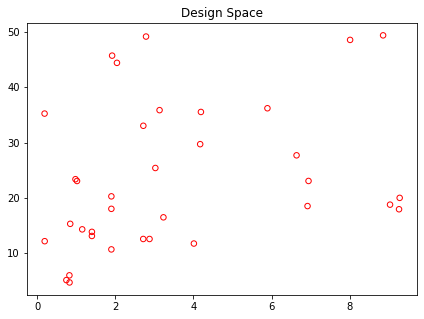

In [6]:

plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')

plt.title("Design Space")
plt.show()

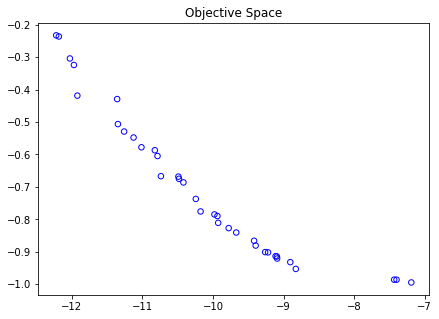

In [7]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


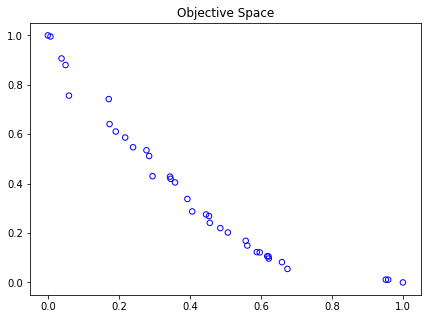

In [8]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()